# Fit hyper-parameters

In [1]:
# Setup ipython environment
%load_ext autoreload
%autoreload 2
%matplotlib inline
from matplotlib.pyplot import *
from numpy import *
from positive import *
from nrutils import scsearch, gwylm
from glob import glob
import pwca
from pwca import determine_data_fitting_region,pwca_catalog,metadata_dict

(positive)>> Applying custom matplotlib settings.
(init)>> Warm greetings from Welsh Puck (aka pwca).
(pwca.core)>> Catalog of calibration runs stored to "pwca.pwca_catalog"
(pwca.core)>> Metadata dictionary for calibration runs stored to "pwca.metadata_dict"


## This is notebook is only for scratch code and prototyping

In [264]:
# Load and unpuack physical parameter space
raw_domain = loadtxt('/Users/book/KOALA/puck/ll/data/version2/fit_intial_binary_parameters.txt')
theta,m1,m2,eta,delta,chi_eff,chi_p,chi1,chi2,a1,a2 = raw_domain.T


# Define desired model domain variables and array 
u = cos(theta)
v = sin(theta)
q = 1.0/eta2q(eta)
model_domain = array( [ u, q, chi_eff, chi_p ] ).T
# model_domain = array( [ u, eta, chi_eff, chi_p ] ).T

# Load and unpuack physical parameter space -- dphi
dphi_range = loadtxt('/Users/book/KOALA/puck/ll/data/version2/fit_opt_dphase_parameters.txt')
nu4,nu5,nu6 = dphi_range.T

# Load and unpuack physical parameter space -- amp
amp_range = loadtxt('/Users/book/KOALA/puck/ll/data/version2/fit_opt_amplitude_parameters.txt')
mu1, mu2, mu3, mu4 = amp_range.T

# labels={'python':['nu4',('u', 'eta', 'chi_eff', 'chi_p'),''],'latex':['nu4',(r'u', r'\eta', r'\chi_s', r'\chi_p'),'']}

(gmvpfit)>> Now working deg = 1
&& The estimator has changed by -inf
&& Degree tempering will continue.
&& The current boundary is ['K' '3' '2' '0']
&& The current estimator value is 0.784332

(gmvpfit)>> Now working deg = 2
&& The estimator has changed by -0.122760
&& Degree tempering will continue.
&& The current boundary is ['K' '23' '2' '12' '11' '1' '03' '02' '01' '0']
&& The current estimator value is 0.661573

(gmvpfit)>> Now working deg = 3
&& The estimator has changed by -0.327126
&& Degree tempering will continue.
&& The current boundary is ['K' '3' '23' '2' '13' '123' '12' '113' '112' '11' '1' '03' '023' '013'
 '012' '011' '01' '003' '002' '001' '00' '0']
&& The current estimator value is 0.334446

(gmvpfit)>> Now working deg = 4
&& The estimator has changed by 0.094891
&& Degree tempering has completed becuase the estimator was made worse by using this max degree. The results of the last iteration wil be kept.
&& The Final boundary is ['K' '3' '23' '2' '13' '123' '12' '113'

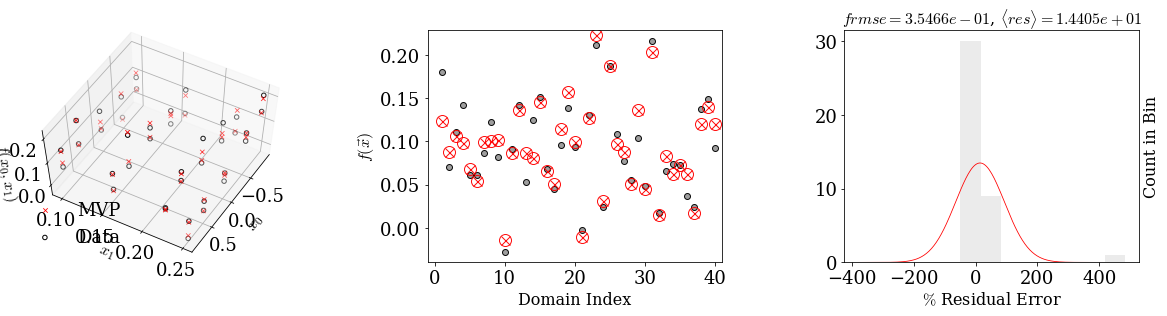

In [344]:
# nu4
# ---
foo = gmvpfit( model_domain, nu4,fitatol=0.002,verbose=True,maxdeg_list=[2,2,1,1],center=True)
foo.plot(); show();

# # nu5
# # ---
# foo = gmvpfit( model_domain, nu5,fitatol=0.002,verbose=True,maxdeg_list=[2,2,2,2],center=True)
# foo.plot(); show();

# # nu6
# # ---
# foo = gmvpfit( model_domain, nu6,fitatol=0.002,verbose=True,maxdeg_list=[2,2,2,1],center=True)
# foo.plot(); show();

# # mu1 
# # ---
# # possibly overfit
# foo = gmvpfit( model_domain, mu1,fitatol=0.004,verbose=True,maxdeg_list=[2,2,2,2],center=True)
# foo.plot(); show();

# # mu2
# # ---
# # not overfit
# foo = gmvpfit( model_domain, mu2,fitatol=0.004,verbose=True,maxdeg_list=[2,2,2,2],center=True)
# foo.plot(); show();

# # mu3
# # ---
# # not overfit
# foo = gmvpfit( model_domain, mu3,fitatol=0.004,verbose=True,maxdeg_list=[2,2,2,2],center=True,temper=True)
# foo.plot(); show();

# # mu4
# # ---
# # not overfit
# foo = gmvpfit( model_domain, mu4,fitatol=0.004,verbose=True,maxdeg_list=[2,2,2,2],center=True)
# foo.plot(); show();

In [112]:

datadir = '/Users/book/KOALA/puck/ll/data/version2/'
foo_path = datadir+'parameter_space_fits.pickle'
foo = pickle.load( open( foo_path, "rb" ) )
